In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import MinMaxScaler


In [60]:
db=pd.read_csv('../data/CAvideos_cc50_202101.csv')

In [11]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40881 non-null  object 
 1   trending_date           40881 non-null  object 
 2   title                   40881 non-null  object 
 3   channel_title           40881 non-null  object 
 4   category_id             40881 non-null  int64  
 5   publish_time            40881 non-null  object 
 6   tags                    40881 non-null  object 
 7   views                   40881 non-null  int64  
 8   likes                   40881 non-null  int64  
 9   dislikes                40881 non-null  int64  
 10  comment_count           40881 non-null  int64  
 11  thumbnail_link          40881 non-null  object 
 12  comments_disabled       40881 non-null  bool   
 13  ratings_disabled        40881 non-null  bool   
 14  video_error_or_removed  40881 non-null

In [12]:
db.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Manitoba,50.150025,-96.883322,POINT (-96.88332178 50.15002545)
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,British Columbia,49.099960,-116.516697,POINT (-116.516697 49.09996035)
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,New Brunswick,45.267042,-66.076675,POINT (-66.07667505000001 45.26704185)
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Saskatchewan,50.933311,-102.799989,POINT (-102.7999891 50.93331097)
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Alberta,53.016698,-112.816639,POINT (-112.8166386 53.01669802)


*Buscamos graficamente si hay valores faltantes*

<Axes: >

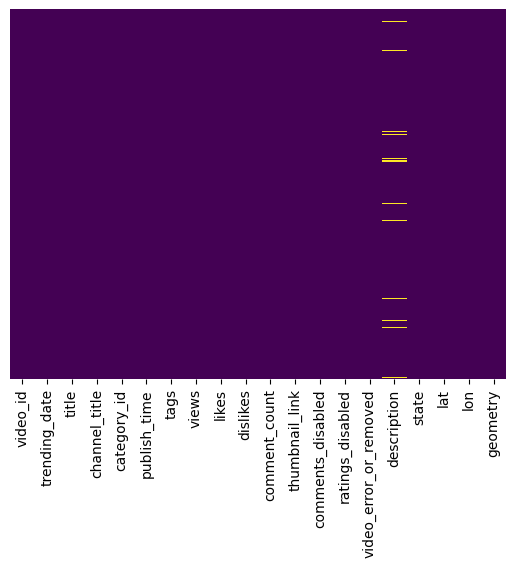

In [13]:
sns.heatmap(db.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Vamos a ver cuántos son

In [14]:
db.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

1296 datos equivalen aproximandamente al 3% de los datos totales, por lo cual podemos obviar dichos datos, puesto que no harían mucha diferencia respecto al total.

In [15]:
db=db.dropna()

<Axes: >

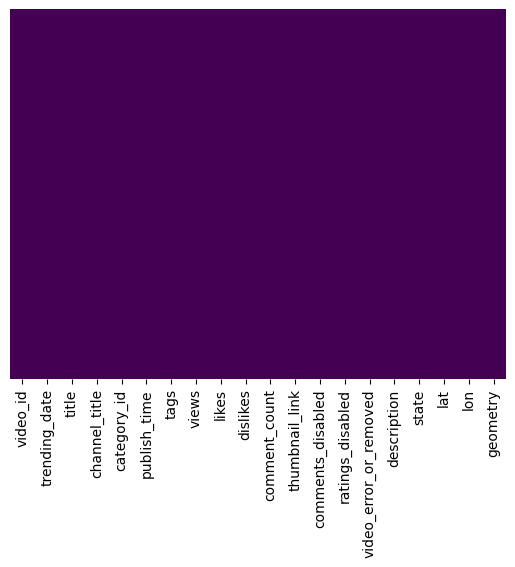

In [16]:
sns.heatmap(db.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Visualización de datos

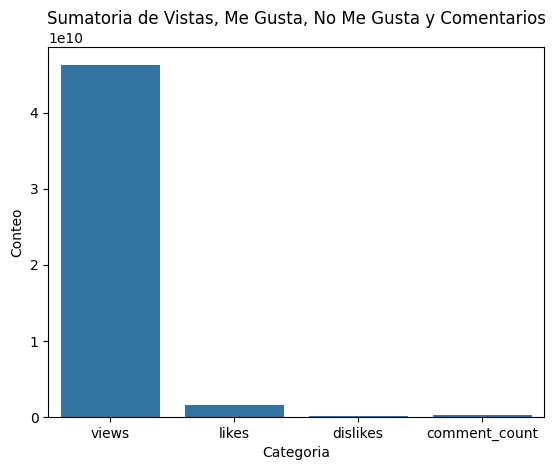

In [17]:
data = db[['views', 'likes', 'dislikes', 'comment_count']].sum().reset_index()
data.columns = ['Categoria', 'Conteo']

sns.barplot(x='Categoria', y='Conteo', data=data)
plt.title('Sumatoria de Vistas, Me Gusta, No Me Gusta y Comentarios')
plt.show()

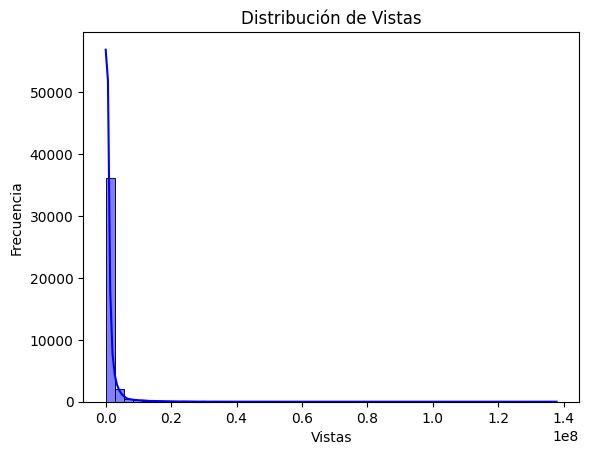

In [18]:
sns.histplot(db['views'], bins=50, color='blue', kde=True)
plt.title('Distribución de Vistas')
plt.xlabel('Vistas')
plt.ylabel('Frecuencia')
plt.show()


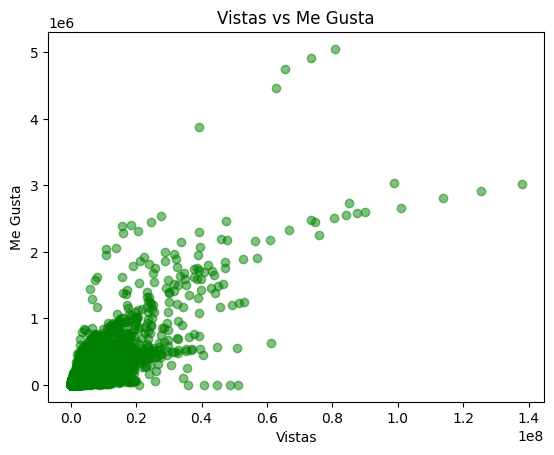

In [19]:
plt.scatter(db['views'], db['likes'], color='green', alpha=0.5)
plt.title('Vistas vs Me Gusta')
plt.xlabel('Vistas')
plt.ylabel('Me Gusta')
plt.show()


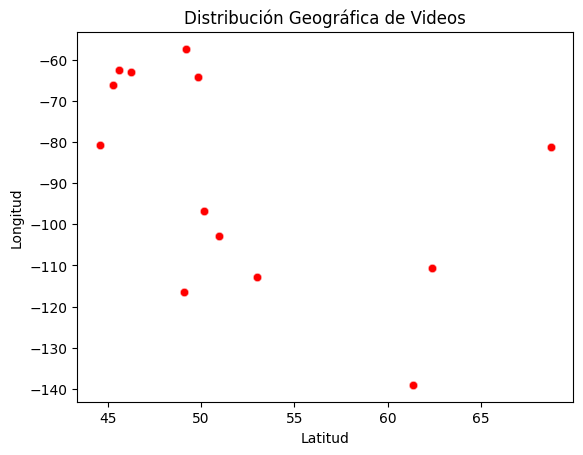

In [20]:
sns.scatterplot(x='lat', y='lon', data=db, alpha=0.5, color='red')
plt.title('Distribución Geográfica de Videos')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.show()

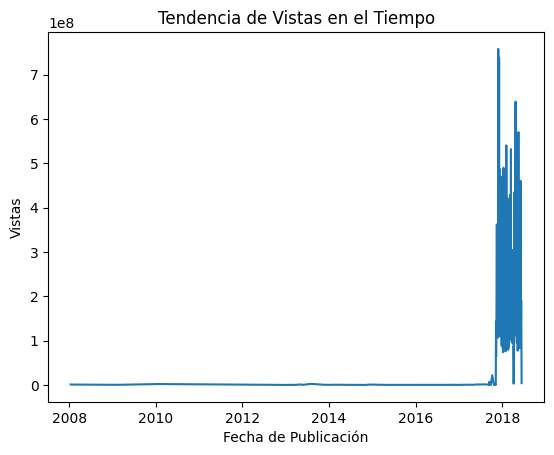

In [21]:
db['publish_time'] = pd.to_datetime(db['publish_time'])

df_grouped = db.groupby(db['publish_time'].dt.date)[['views']].sum().reset_index()

sns.lineplot(x='publish_time', y='views', data=df_grouped)
plt.title('Tendencia de Vistas en el Tiempo')
plt.xlabel('Fecha de Publicación')
plt.ylabel('Vistas')
plt.show()



*Búsqueda de outliers*

In [22]:
db.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon
count,39585.000000,3.958500e+04,3.958500e+04,3.958500e+04,3.958500e+04,39585.000000,39585.000000
mean,20.778123,1.169234e+06,4.059694e+04,2.058693e+03,5.159716e+03,52.023377,-88.814717
std,6.808714,3.437842e+06,1.345967e+05,1.931258e+04,2.189959e+04,7.207378,25.119362
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00,44.566645,-139.000002
25%,20.000000,1.497150e+05,2.395000e+03,1.040000e+02,4.420000e+02,46.249282,-110.733329
50%,24.000000,3.831200e+05,9.244000e+03,3.140000e+02,1.357000e+03,49.822578,-81.236083
75%,24.000000,9.831390e+05,2.967000e+04,9.760000e+02,3.821000e+03,53.016698,-64.347995
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06,68.767467,-57.426919


In [23]:
def transform_outliers_to_median(data):
    median_value = np.median(data)
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 3 * iqr
    upper_bound = q3 + 3 * iqr    
    transformed_data = np.where((data < lower_bound) | (data > upper_bound), median_value, data)
    return transformed_data

In [24]:
db_sin_outliers=db

db_sin_outliers['views']=transform_outliers_to_median(db_sin_outliers['views'])
db_sin_outliers['likes']=transform_outliers_to_median(db_sin_outliers['likes'])
db_sin_outliers['dislikes']=transform_outliers_to_median(db_sin_outliers['dislikes'])
db_sin_outliers['comment_count']=transform_outliers_to_median(db_sin_outliers['comment_count'])

views

<Axes: ylabel='views'>

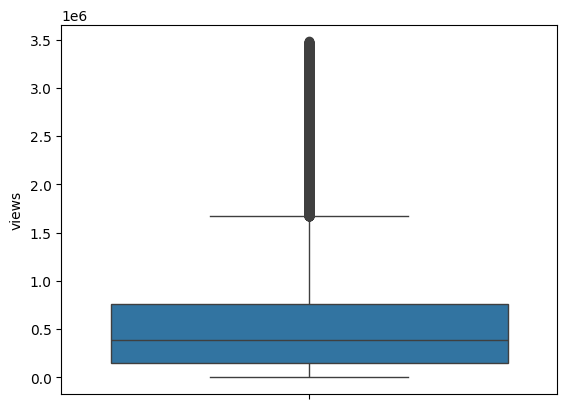

In [25]:
sns.boxplot(db_sin_outliers['views'])

<Axes: ylabel='views'>

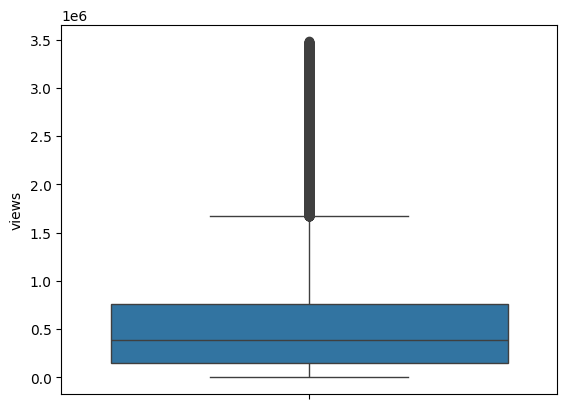

In [26]:
sns.boxplot(y=db['views'])

likes

<Axes: ylabel='likes'>

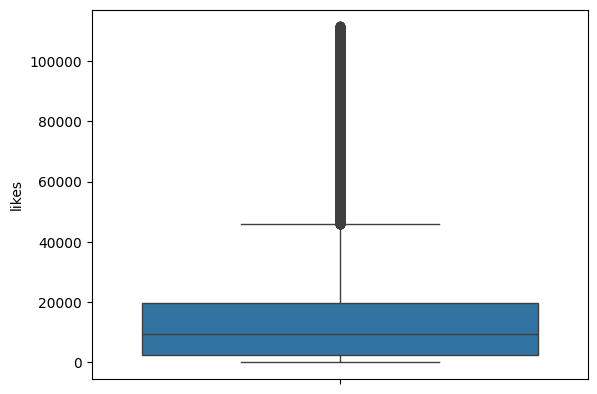

In [27]:
sns.boxplot(db_sin_outliers['likes'])

<Axes: ylabel='likes'>

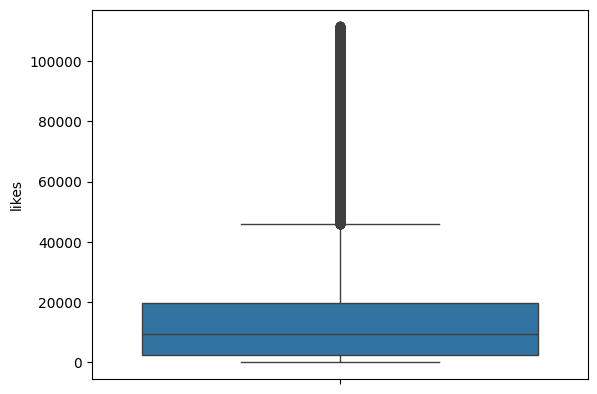

In [28]:
sns.boxplot(y=db['likes'])

dislikes

<Axes: ylabel='dislikes'>

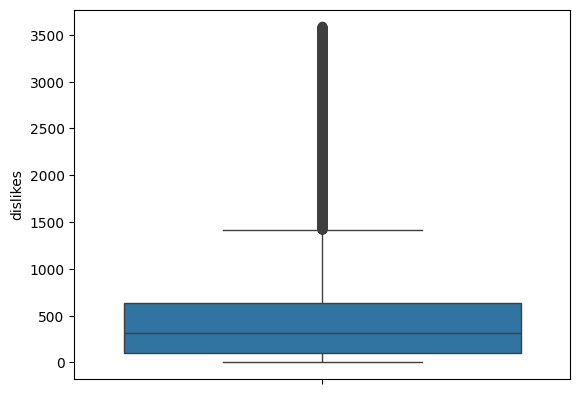

In [29]:
sns.boxplot(db_sin_outliers['dislikes']) 

<Axes: ylabel='dislikes'>

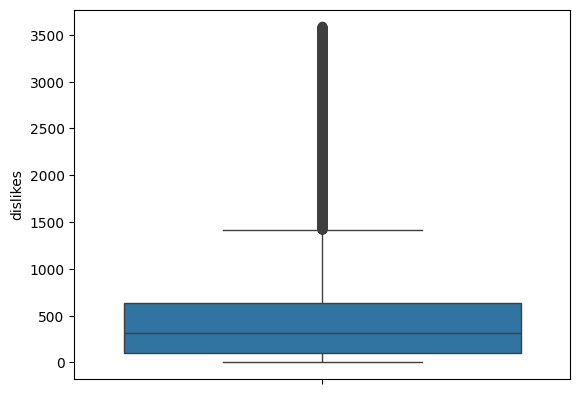

In [30]:
sns.boxplot(y=db['dislikes'])

comment count

<Axes: ylabel='comment_count'>

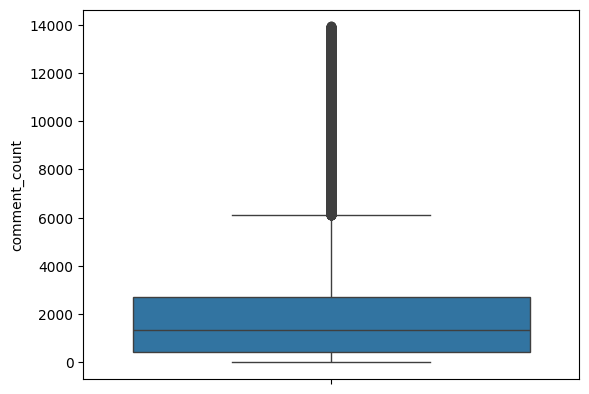

In [31]:
sns.boxplot(db_sin_outliers['comment_count']) 

<Axes: ylabel='comment_count'>

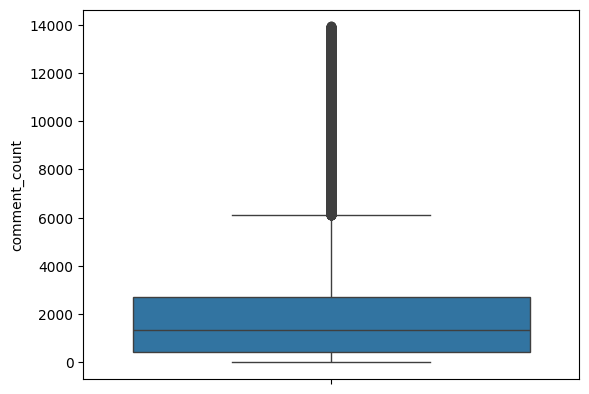

In [32]:
sns.boxplot(y=db['comment_count'])

eliminando columnas innecesarias

In [33]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39585 entries, 0 to 40880
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                39585 non-null  object             
 1   trending_date           39585 non-null  object             
 2   title                   39585 non-null  object             
 3   channel_title           39585 non-null  object             
 4   category_id             39585 non-null  int64              
 5   publish_time            39585 non-null  datetime64[ns, UTC]
 6   tags                    39585 non-null  object             
 7   views                   39585 non-null  float64            
 8   likes                   39585 non-null  float64            
 9   dislikes                39585 non-null  float64            
 10  comment_count           39585 non-null  float64            
 11  thumbnail_link          39585 non-null  object

In [34]:
db_sin_outliers.drop('thumbnail_link',axis=1,inplace=True)
db_sin_outliers.drop('description',axis=1,inplace=True)

In [35]:
scaler = MinMaxScaler()
db_sin_outliers['new_views'] = scaler.fit_transform(db_sin_outliers[['views']])
db_sin_outliers['new_likes'] = scaler.fit_transform(db_sin_outliers[['likes']])
db_sin_outliers['new_dislikes'] = scaler.fit_transform(db_sin_outliers[['dislikes']])
db_sin_outliers['new_comment_count'] = scaler.fit_transform(db_sin_outliers[['comment_count']])

In [36]:
db_sin_outliers.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon,new_views,new_likes,new_dislikes,new_comment_count
count,39585.000000,3.958500e+04,39585.000000,39585.000000,39585.000000,39585.000000,39585.000000,39585.000000,39585.000000,39585.000000,39585.000000
mean,20.778123,5.967367e+05,16157.893874,528.792699,2187.057749,52.023377,-88.814717,0.171146,0.144929,0.147255,0.156970
std,6.808714,6.756401e+05,21348.665614,678.688313,2678.181124,7.207378,25.119362,0.194014,0.191488,0.188997,0.192219
min,1.000000,7.330000e+02,0.000000,0.000000,0.000000,44.566645,-139.000002,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.497150e+05,2395.000000,104.000000,442.000000,46.249282,-110.733329,0.042781,0.021482,0.028961,0.031723
50%,24.000000,3.831200e+05,9244.000000,314.000000,1357.000000,49.822578,-81.236083,0.109805,0.082915,0.087441,0.097395
75%,24.000000,7.579970e+05,19809.000000,630.000000,2714.000000,53.016698,-64.347995,0.217453,0.177678,0.175439,0.194789
max,43.000000,3.483165e+06,111488.000000,3591.000000,13933.000000,68.767467,-57.426919,1.000000,1.000000,1.000000,1.000000


In [37]:
db_sin_outliers.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,state,lat,lon,geometry,new_views,new_likes,new_dislikes,new_comment_count
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",383120.0,9244.0,314.0,...,False,False,Manitoba,50.150025,-96.883322,POINT (-96.88332178 50.15002545),0.109805,0.082915,0.087441,0.097395
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,9244.0,1688.0,...,False,False,British Columbia,49.099960,-116.516697,POINT (-116.516697 49.09996035),0.291152,0.082915,0.470064,0.935190
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,9244.0,314.0,...,False,False,New Brunswick,45.267042,-66.076675,POINT (-66.07667505000001 45.26704185),0.916228,0.082915,0.087441,0.587167
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,9244.0,1989.0,...,False,False,Saskatchewan,50.933311,-102.799989,POINT (-102.7999891 50.93331097),0.601618,0.082915,0.553885,0.097395
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",383120.0,9244.0,314.0,...,False,False,Alberta,53.016698,-112.816639,POINT (-112.8166386 53.01669802),0.109805,0.082915,0.087441,0.097395


Pregunta 1: ¿Qué categorías de videos son las de mayor tendencia?

C:\Users\sdiaz\AppData\Local\Temp\ipykernel_20020\1212266499.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category_id', y='new_views', data=category_views, palette='viridis')


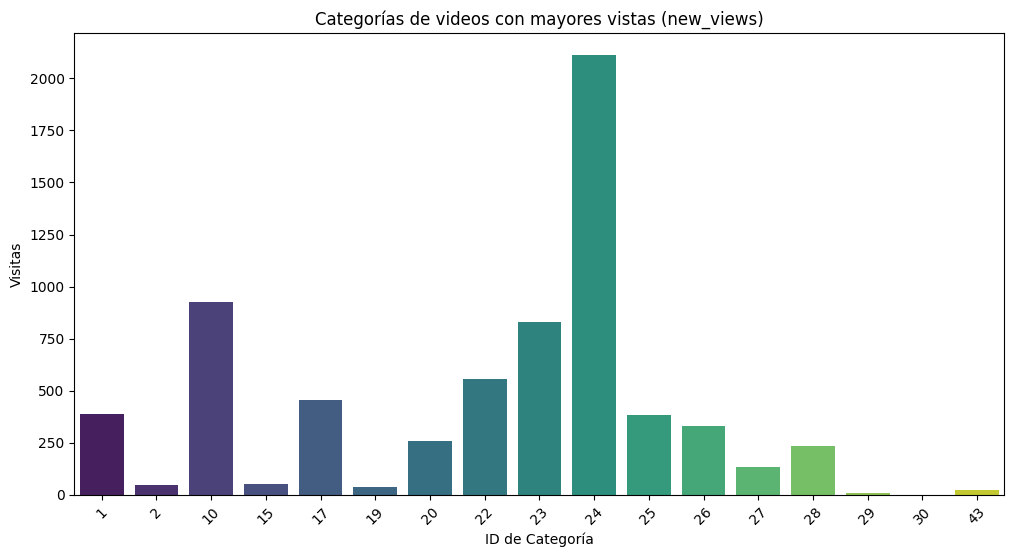

Categorías de videos con mayores vistas (new_views):
    category_id    new_views
9            24  2113.461719
2            10   923.688337
8            23   830.194167
7            22   556.382184
4            17   456.516972
0             1   386.505524
10           25   381.616822
11           26   332.701659
6            20   259.465133
13           28   234.672010


In [38]:
data = db_sin_outliers[['category_id', 'new_views']]

# Agrupar por categoría y calcular la suma de new_views
category_views = data.groupby('category_id')['new_views'].sum().reset_index()
category_views = category_views.sort_values(by='new_views', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='category_id', y='new_views', data=category_views, palette='viridis')
plt.title('Categorías de videos con mayores vistas (new_views)')
plt.xlabel('ID de Categoría')
plt.ylabel('Visitas')
plt.xticks(rotation=45)
plt.show()

print("Categorías de videos con mayores vistas (new_views):")
print(category_views.head(10))

In [39]:
#Modelo de regresion Lineal

from sklearn.linear_model import LinearRegression


X = data[['category_id']]
y = data['new_views']

# Normalizar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_scaled, y)



# Hacer predicciones (esto es solo un ejemplo, en realidad estaríamos prediciendo nuevos datos)
y_pred = model.predict(X_scaled)

# Agregar las predicciones al DataFrame
data['predicted_views'] = y_pred

# Mostrar resultados
result = data.groupby('category_id')['predicted_views'].sum().reset_index()
result = result.sort_values(by='predicted_views', ascending=False)


# Paso 6: Resultados
print("Categorías con mayores tendencias basadas en new_views:")
print(result.head())

Categorías con mayores tendencias basadas en new_views:
    category_id  predicted_views
9            24      2138.963235
2            10       740.801259
7            22       625.295342
10           25       617.535734
8            23       614.986825


C:\Users\sdiaz\AppData\Local\Temp\ipykernel_20020\2135315278.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_views'] = y_pred


Pregunta 2:¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

C:\Users\sdiaz\AppData\Local\Temp\ipykernel_20020\4282932496.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category_id', y='new_likes', data=category_likes, palette='viridis')


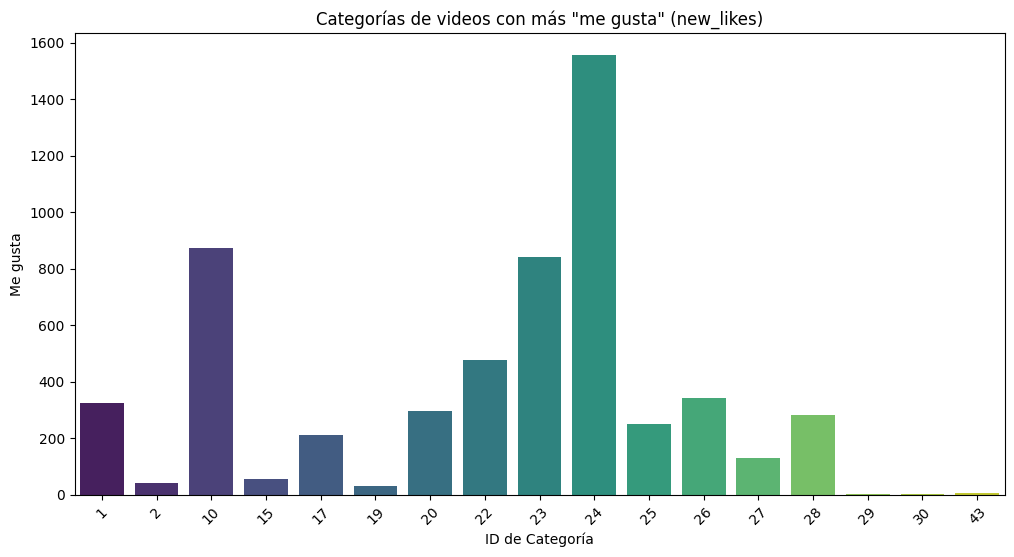

C:\Users\sdiaz\AppData\Local\Temp\ipykernel_20020\4282932496.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category_id', y='new_dislikes', data=category_dislikes, palette='viridis')


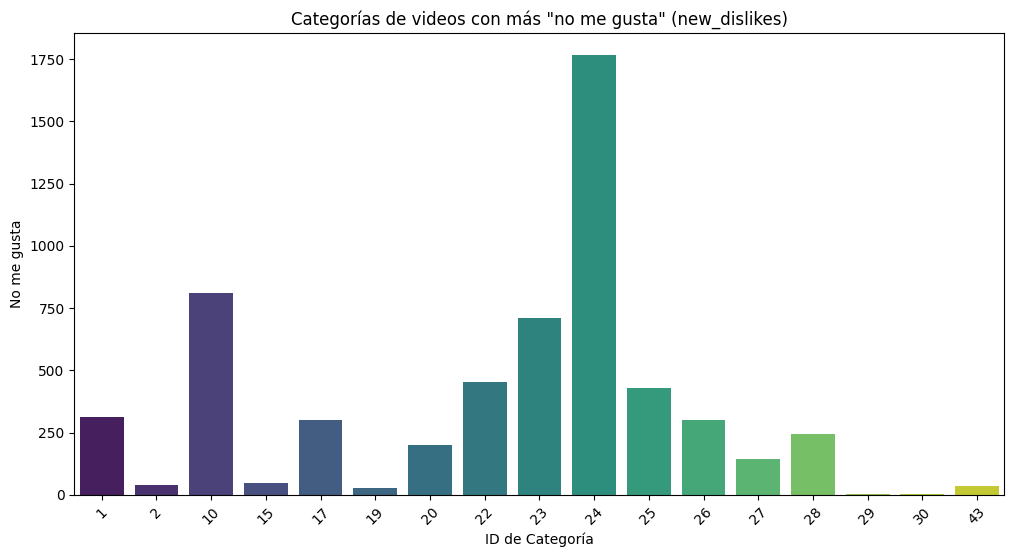

Categorías de videos con más 'me gusta' (new_likes):
    category_id    new_likes
9            24  1558.030012
2            10   873.774909
8            23   841.292659
7            22   478.592862
11           26   344.428656
0             1   326.664430
6            20   298.205260
13           28   281.166978
10           25   251.783815
4            17   213.049978

Categorías de videos con menos 'me gusta' (new_likes):
    category_id   new_likes
13           28  281.166978
10           25  251.783815
4            17  213.049978
12           27  129.641513
3            15   57.051001
1             2   42.313424
5            19   31.254386
16           43    5.285439
15           30    2.268450
14           29    2.228276

Categorías de videos con más 'no me gusta' (new_dislikes):
    category_id  new_dislikes
9            24   1768.089669
2            10    809.380395
8            23    710.206349
7            22    453.543581
10           25    427.574492
0             1    313.9

In [40]:
# Paso 1: Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Paso 2: Seleccionar columnas relevantes
data = db_sin_outliers[['category_id', 'new_likes', 'new_dislikes']]

# Paso 3: Agrupar por categoría y calcular la suma de new_likes y new_dislikes
category_likes = data.groupby('category_id')['new_likes'].sum().reset_index()
category_dislikes = data.groupby('category_id')['new_dislikes'].sum().reset_index()

# Ordenar los resultados
category_likes = category_likes.sort_values(by='new_likes', ascending=False)
category_dislikes = category_dislikes.sort_values(by='new_dislikes', ascending=False)

# Paso 4: Visualización de las categorías con más y menos "me gusta"
plt.figure(figsize=(12, 6))
sns.barplot(x='category_id', y='new_likes', data=category_likes, palette='viridis')
plt.title('Categorías de videos con más "me gusta" (new_likes)')
plt.xlabel('ID de Categoría')
plt.ylabel('Me gusta')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='category_id', y='new_dislikes', data=category_dislikes, palette='viridis')
plt.title('Categorías de videos con más "no me gusta" (new_dislikes)')
plt.xlabel('ID de Categoría')
plt.ylabel('No me gusta')
plt.xticks(rotation=45)
plt.show()

# Paso 5: Mostrar los resultados escritos de las categorías con más y menos "me gusta" y "no me gusta"
print("Categorías de videos con más 'me gusta' (new_likes):")
print(category_likes.head(10))

print("\nCategorías de videos con menos 'me gusta' (new_likes):")
print(category_likes.tail(10))

print("\nCategorías de videos con más 'no me gusta' (new_dislikes):")
print(category_dislikes.head(10))

print("\nCategorías de videos con menos 'no me gusta' (new_dislikes):")
print(category_dislikes.tail(10))

C:\Users\sdiaz\AppData\Local\Temp\ipykernel_20020\1010339164.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_likes'] = y_likes_pred
C:\Users\sdiaz\AppData\Local\Temp\ipykernel_20020\1010339164.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_dislikes'] = y_dislikes_pred
C:\Users\sdiaz\AppData\Local\Temp\ipykernel_20020\1010339164.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

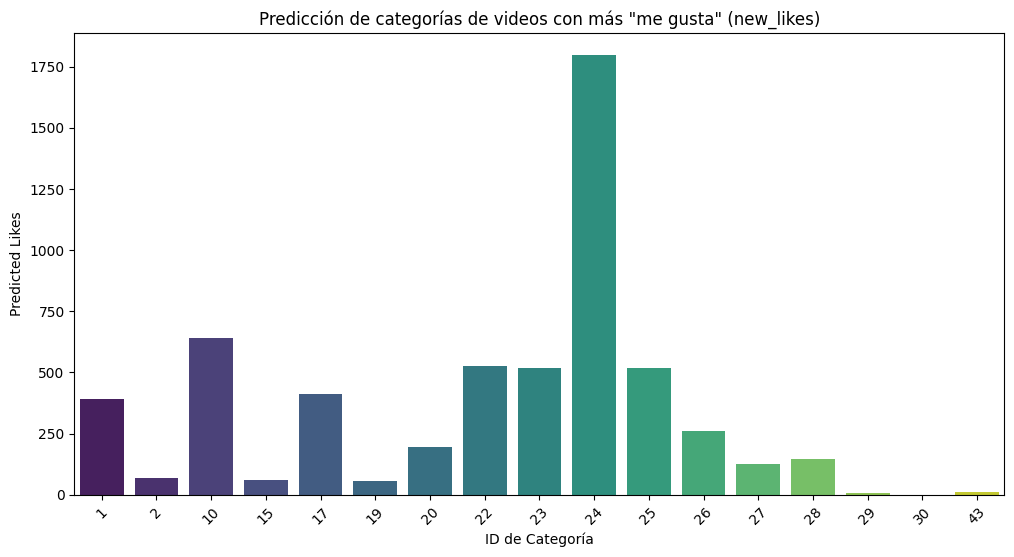

C:\Users\sdiaz\AppData\Local\Temp\ipykernel_20020\1010339164.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category_id', y='predicted_dislikes', data=predicted_dislikes, palette='viridis')


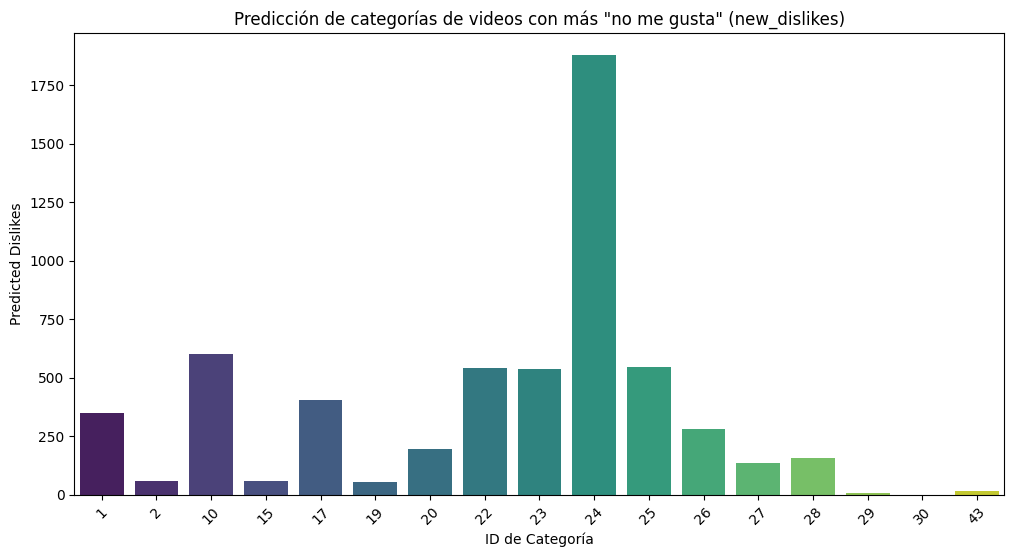

Predicción de categorías de videos con más 'me gusta' (new_likes):
    category_id  predicted_likes
9            24      1798.926402
2            10       638.947615
7            22       528.182870
8            23       518.366600
10           25       518.174488
4            17       410.066111
0             1       392.790073
11           26       262.471793
6            20       195.443997
13           28       144.215618

Predicción de categorías de videos con menos 'me gusta' (new_likes):
    category_id  predicted_likes
11           26       262.471793
6            20       195.443997
13           28       144.215618
12           27       126.452217
1             2        67.407497
3            15        59.016494
5            19        56.379430
16           43        10.814675
14           29         8.650300
15           30         0.725871

Predicción de categorías de videos con más 'no me gusta' (new_dislikes):
    category_id  predicted_dislikes
9            24         187

In [41]:
# Paso 2: Seleccionar columnas relevantes
data = db_sin_outliers[['category_id', 'new_likes', 'new_dislikes']]

# Paso 3: Agrupar por categoría y calcular la suma de new_likes y new_dislikes
category_likes = data.groupby('category_id')['new_likes'].sum().reset_index()
category_dislikes = data.groupby('category_id')['new_dislikes'].sum().reset_index()

# Ordenar los resultados
category_likes = category_likes.sort_values(by='new_likes', ascending=False)
category_dislikes = category_dislikes.sort_values(by='new_dislikes', ascending=False)

# Paso 4: Preparar los datos para el modelo
X = data[['category_id']]
y_likes = data['new_likes']
y_dislikes = data['new_dislikes']

# Normalizar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Crear y entrenar el modelo para 'new_likes'
model_likes = LinearRegression()
model_likes.fit(X_scaled, y_likes)

# Hacer predicciones para 'new_likes'
y_likes_pred = model_likes.predict(X_scaled)
data['predicted_likes'] = y_likes_pred

# Crear y entrenar el modelo para 'new_dislikes'
model_dislikes = LinearRegression()
model_dislikes.fit(X_scaled, y_dislikes)

# Hacer predicciones para 'new_dislikes'
y_dislikes_pred = model_dislikes.predict(X_scaled)
data['predicted_dislikes'] = y_dislikes_pred

# Mostrar resultados de predicciones agrupados por categoría
predicted_likes = data.groupby('category_id')['predicted_likes'].sum().reset_index()
predicted_dislikes = data.groupby('category_id')['predicted_dislikes'].sum().reset_index()

predicted_likes = predicted_likes.sort_values(by='predicted_likes', ascending=False)
predicted_dislikes = predicted_dislikes.sort_values(by='predicted_dislikes', ascending=False)

# Paso 5: Visualización de las categorías con más y menos 'me gusta' predichos
plt.figure(figsize=(12, 6))
sns.barplot(x='category_id', y='predicted_likes', data=predicted_likes, palette='viridis')
plt.title('Predicción de categorías de videos con más "me gusta" (new_likes)')
plt.xlabel('ID de Categoría')
plt.ylabel('Predicted Likes')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='category_id', y='predicted_dislikes', data=predicted_dislikes, palette='viridis')
plt.title('Predicción de categorías de videos con más "no me gusta" (new_dislikes)')
plt.xlabel('ID de Categoría')
plt.ylabel('Predicted Dislikes')
plt.xticks(rotation=45)
plt.show()

# Paso 6: Mostrar los resultados escritos de las categorías con más y menos "me gusta" y "no me gusta"
print("Predicción de categorías de videos con más 'me gusta' (new_likes):")
print(predicted_likes.head(10))

print("\nPredicción de categorías de videos con menos 'me gusta' (new_likes):")
print(predicted_likes.tail(10))

print("\nPredicción de categorías de videos con más 'no me gusta' (new_dislikes):")
print(predicted_dislikes.head(10))

print("\nPredicción de categorías de videos con menos 'no me gusta' (new_dislikes):")
print(predicted_dislikes.tail(10))

Pregunta 3: ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me
gusta”?

C:\Users\sdiaz\AppData\Local\Temp\ipykernel_20020\169544236.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category_id', y='like_dislike_ratio', data=category_ratios, palette='viridis')


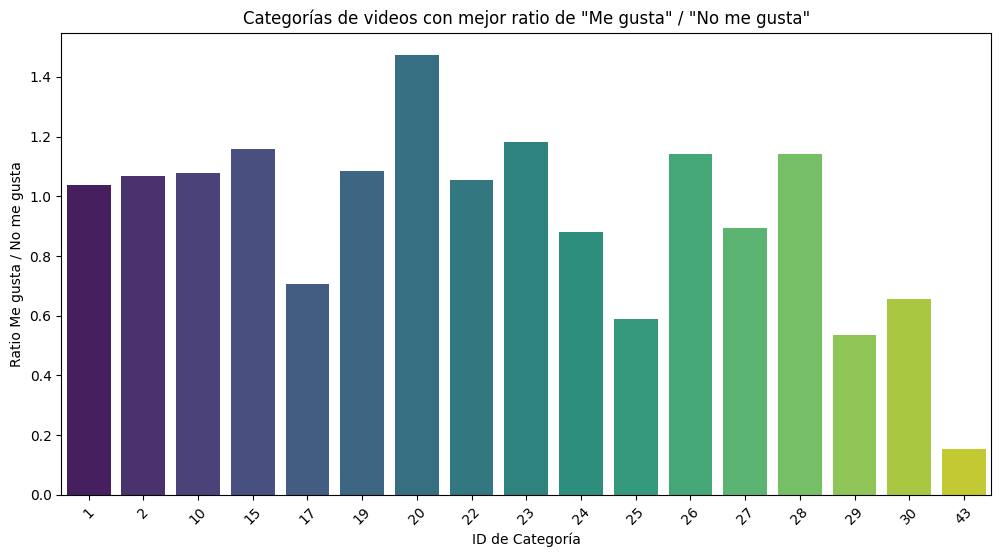

Categorías de videos con mejor ratio de 'Me gusta' / 'No me gusta':
    category_id   new_likes  new_dislikes  like_dislike_ratio
6            20  298.205260    201.304651            1.474041
8            23  841.292659    710.206349            1.182909
3            15   57.051001     48.299916            1.157223
13           28  281.166978    244.981064            1.143043
11           26  344.428656    300.727374            1.141523
5            19   31.254386     27.841270            1.083669
2            10  873.774909    809.380395            1.078228
1             2   42.313424     38.616820            1.068067
7            22  478.592862    453.543581            1.052909
0             1  326.664430    313.924534            1.037278


In [42]:
# Paso 2: Seleccionar columnas relevantes
data = db_sin_outliers[['category_id', 'new_likes', 'new_dislikes']]

# Paso 3: Agrupar por categoría y calcular la suma de new_likes y new_dislikes
category_likes = data.groupby('category_id')['new_likes'].sum().reset_index()
category_dislikes = data.groupby('category_id')['new_dislikes'].sum().reset_index()

# Paso 4: Combinar los resultados y calcular el ratio
category_ratios = pd.merge(category_likes, category_dislikes, on='category_id')
category_ratios['like_dislike_ratio'] = category_ratios['new_likes'] / (category_ratios['new_dislikes'] + 1)

# Ordenar los resultados
category_ratios = category_ratios.sort_values(by='like_dislike_ratio', ascending=False)

# Paso 5: Visualización de las categorías con mejor ratio
plt.figure(figsize=(12, 6))
sns.barplot(x='category_id', y='like_dislike_ratio', data=category_ratios, palette='viridis')
plt.title('Categorías de videos con mejor ratio de "Me gusta" / "No me gusta"')
plt.xlabel('ID de Categoría')
plt.ylabel('Ratio Me gusta / No me gusta')
plt.xticks(rotation=45)
plt.show()

# Paso 6: Mostrar los resultados escritos de las categorías con mejor ratio
print("Categorías de videos con mejor ratio de 'Me gusta' / 'No me gusta':")
print(category_ratios.head(10))

C:\Users\sdiaz\AppData\Local\Temp\ipykernel_20020\3290981087.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['like_dislike_ratio'] = data['new_likes'] / (data['new_dislikes'] + 1)
C:\Users\sdiaz\AppData\Local\Temp\ipykernel_20020\3290981087.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_ratio'] = y_pred


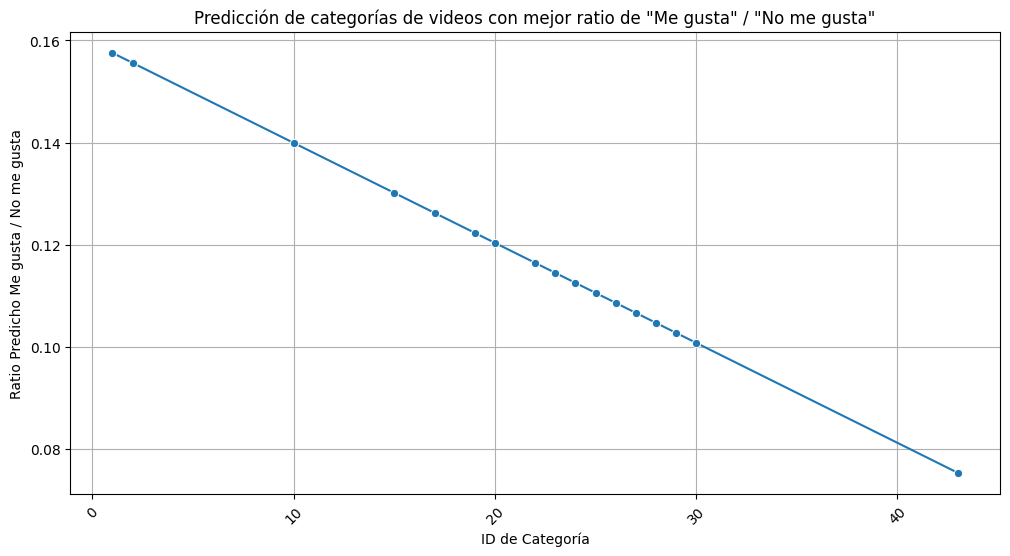

Predicción de categorías de videos con mejor ratio de 'Me gusta' / 'No me gusta':
   category_id  predicted_ratio
0            1         0.157565
1            2         0.155606
2           10         0.139933
3           15         0.130138
4           17         0.126220
5           19         0.122302
6           20         0.120343
7           22         0.116425
8           23         0.114466
9           24         0.112506


In [43]:
data = db_sin_outliers[['category_id', 'new_likes', 'new_dislikes']]

# Paso 3: Calcular el ratio
data['like_dislike_ratio'] = data['new_likes'] / (data['new_dislikes'] + 1)

# Paso 4: Preparar los datos para el modelo
X = data[['category_id']]
y = data['like_dislike_ratio']

# Normalizar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Crear y entrenar el modelo de regresión
model = LinearRegression()
model.fit(X_scaled, y)

# Hacer predicciones
y_pred = model.predict(X_scaled)
data['predicted_ratio'] = y_pred

# Agrupar las predicciones por categoría
predicted_ratios = data.groupby('category_id')['predicted_ratio'].mean().reset_index()
predicted_ratios = predicted_ratios.sort_values(by='predicted_ratio', ascending=False)

# Paso 5: Visualización de las categorías con mejor ratio predicho
plt.figure(figsize=(12, 6))
sns.lineplot(x='category_id', y='predicted_ratio', data=predicted_ratios, marker='o')
plt.title('Predicción de categorías de videos con mejor ratio de "Me gusta" / "No me gusta"')
plt.xlabel('ID de Categoría')
plt.ylabel('Ratio Predicho Me gusta / No me gusta')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Paso 6: Mostrar los resultados escritos de las categorías con mejor ratio predicho
print("Predicción de categorías de videos con mejor ratio de 'Me gusta' / 'No me gusta':")
print(predicted_ratios.head(10))

Pregunta 4: ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” /
“Comentarios”?

C:\Users\sdiaz\AppData\Local\Temp\ipykernel_20020\3438023408.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['views_comments_ratio'] = data['new_views'] / (data['new_comment_count'] + 1)
C:\Users\sdiaz\AppData\Local\Temp\ipykernel_20020\3438023408.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category_id', y='views_comments_ratio', data=category_ratios, palette='viridis')


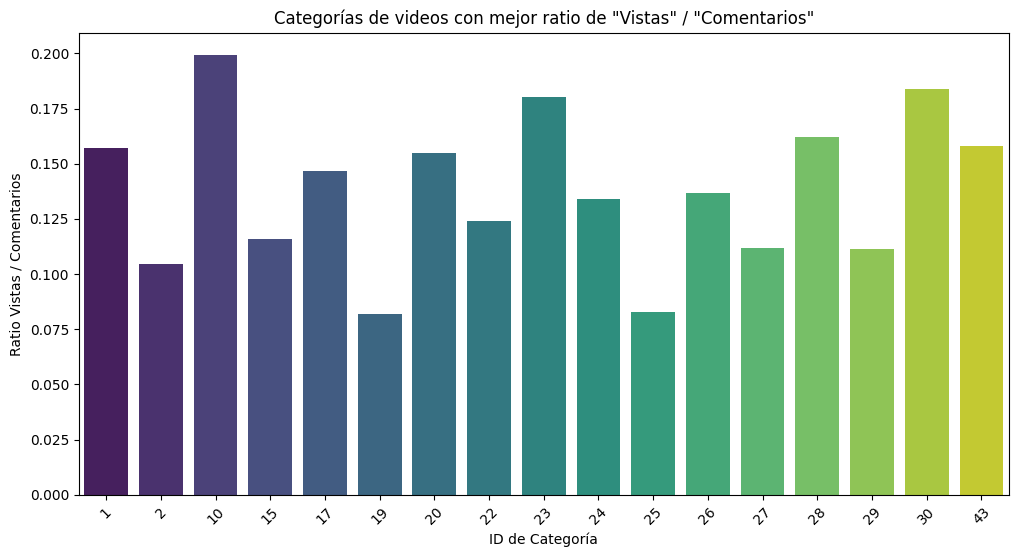

Categorías de videos con mejor ratio de 'Vistas' / 'Comentarios':
    category_id  views_comments_ratio
2            10              0.199357
15           30              0.184024
8            23              0.180071
13           28              0.161896
16           43              0.158021
0             1              0.156963
6            20              0.154640
4            17              0.146506
11           26              0.136657
9            24              0.134136


In [44]:
data = db_sin_outliers[['category_id', 'new_views', 'new_comment_count']]

# Paso 3: Calcular el ratio
data['views_comments_ratio'] = data['new_views'] / (data['new_comment_count'] + 1)

# Agrupar por categoría y calcular la media de views_comments_ratio
category_ratios = data.groupby('category_id')['views_comments_ratio'].mean().reset_index()
category_ratios = category_ratios.sort_values(by='views_comments_ratio', ascending=False)

# Paso 4: Visualización de las categorías con mejor ratio
plt.figure(figsize=(12, 6))
sns.barplot(x='category_id', y='views_comments_ratio', data=category_ratios, palette='viridis')
plt.title('Categorías de videos con mejor ratio de "Vistas" / "Comentarios"')
plt.xlabel('ID de Categoría')
plt.ylabel('Ratio Vistas / Comentarios')
plt.xticks(rotation=45)
plt.show()

# Mostrar los resultados escritos de las categorías con mejor ratio
print("Categorías de videos con mejor ratio de 'Vistas' / 'Comentarios':")
print(category_ratios.head(10))

C:\Users\sdiaz\AppData\Local\Temp\ipykernel_20020\1972752779.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_ratio'] = y_pred


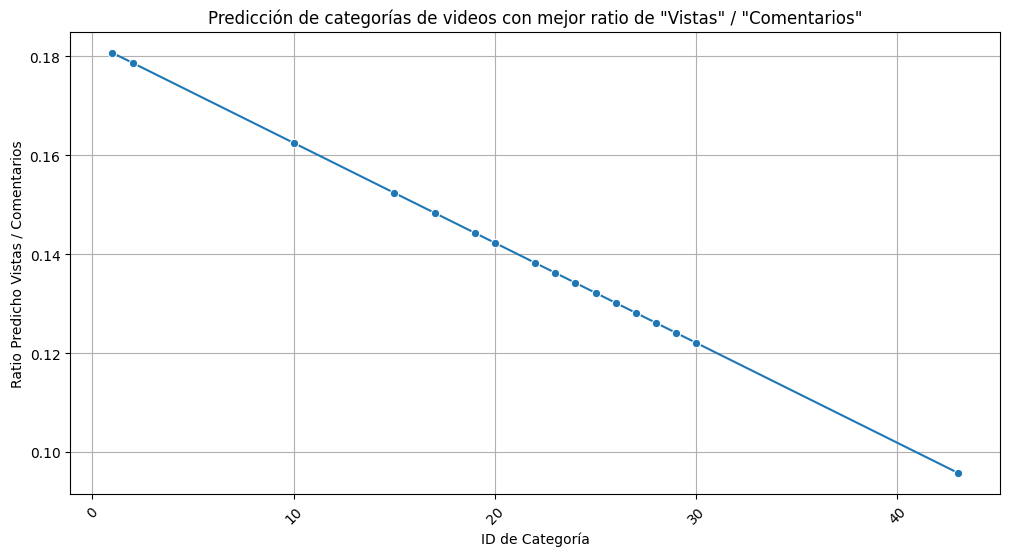

Predicción de categorías de videos con mejor ratio de 'Vistas' / 'Comentarios':
   category_id  predicted_ratio
0            1         0.180713
1            2         0.178691
2           10         0.162513
3           15         0.152402
4           17         0.148357
5           19         0.144313
6           20         0.142290
7           22         0.138246
8           23         0.136223
9           24         0.134201


In [45]:
# Paso 2: Preparar los datos para el modelo
X = data[['category_id']]
y = data['views_comments_ratio']

# Normalizar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Crear y entrenar el modelo de regresión
model = LinearRegression()
model.fit(X_scaled, y)

# Hacer predicciones
y_pred = model.predict(X_scaled)
data['predicted_ratio'] = y_pred

# Agrupar las predicciones por categoría
predicted_ratios = data.groupby('category_id')['predicted_ratio'].mean().reset_index()
predicted_ratios = predicted_ratios.sort_values(by='predicted_ratio', ascending=False)

# Paso 3: Visualización de las categorías con mejor ratio predicho (line plot)
plt.figure(figsize=(12, 6))
sns.lineplot(x='category_id', y='predicted_ratio', data=predicted_ratios, marker='o')
plt.title('Predicción de categorías de videos con mejor ratio de "Vistas" / "Comentarios"')
plt.xlabel('ID de Categoría')
plt.ylabel('Ratio Predicho Vistas / Comentarios')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Paso 4: Mostrar los resultados escritos de las categorías con mejor ratio predicho
print("Predicción de categorías de videos con mejor ratio de 'Vistas' / 'Comentarios':")
print(predicted_ratios.head(10))

Pregunta 5: ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

  period  min  max  median        mean
0      1  185  198   193.0  192.888889
1      2  191  198   196.0  195.037037
2      3  185  197   192.0  191.750000
3      4  183  197   192.0  191.407407
4      5  186  198   194.0  193.576923
5      6  191  197   193.0  193.857143
6      7  163  198   192.5  192.038462
7      8  190  199   194.0  194.222222


C:\Users\sdiaz\AppData\Local\Temp\ipykernel_20020\979082004.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_per_period = volumen_tiempo.groupby('period')['video_count'].agg(['min', 'max', 'median', 'mean']).reset_index()


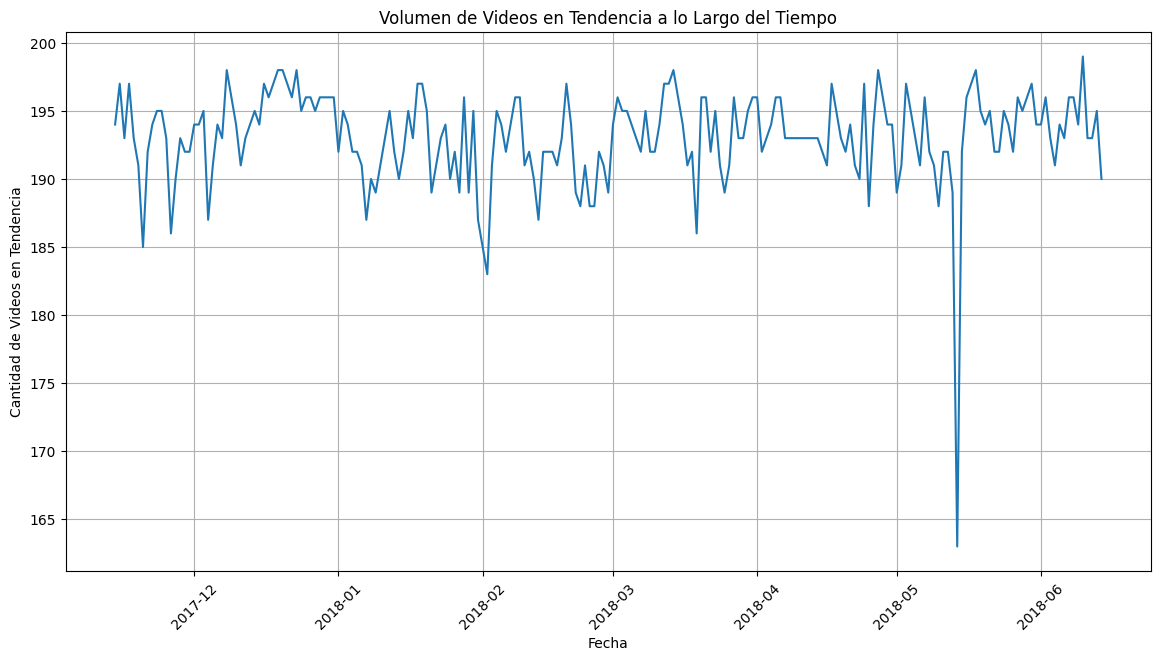

In [46]:
# Trending Date a datetime
db_sin_outliers['trending_date'] = pd.to_datetime(db_sin_outliers['trending_date'], format='%y.%d.%m')

volumen_tiempo = db_sin_outliers.groupby('trending_date').size().reset_index(name='video_count')

# Dividir los datos en periodos
volumen_tiempo['period'] = pd.cut(volumen_tiempo['trending_date'], bins=8, labels=[1, 2, 3, 4, 5, 6, 7, 8])

# Calcular estadísticas para cada periodo
stats_per_period = volumen_tiempo.groupby('period')['video_count'].agg(['min', 'max', 'median', 'mean']).reset_index()
print(stats_per_period)

# Visualización
plt.figure(figsize=(14, 7))
sns.lineplot(x='trending_date', y='video_count', data=volumen_tiempo)
plt.title('Volumen de Videos en Tendencia a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Videos en Tendencia')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Pregunta 6: ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?

        channel_title  frequency
0           SET India        192
1               MSNBC        189
2                 FBE        188
3     The Young Turks        186
4               REACT        183
...               ...        ...
4768          中国有嘻嘻哈哈          1
4769          InVideo          1
4770         LIVE 郭文贵          1
4771       TonyvToons          1
4772           DKDKTV          1

[4773 rows x 2 columns]


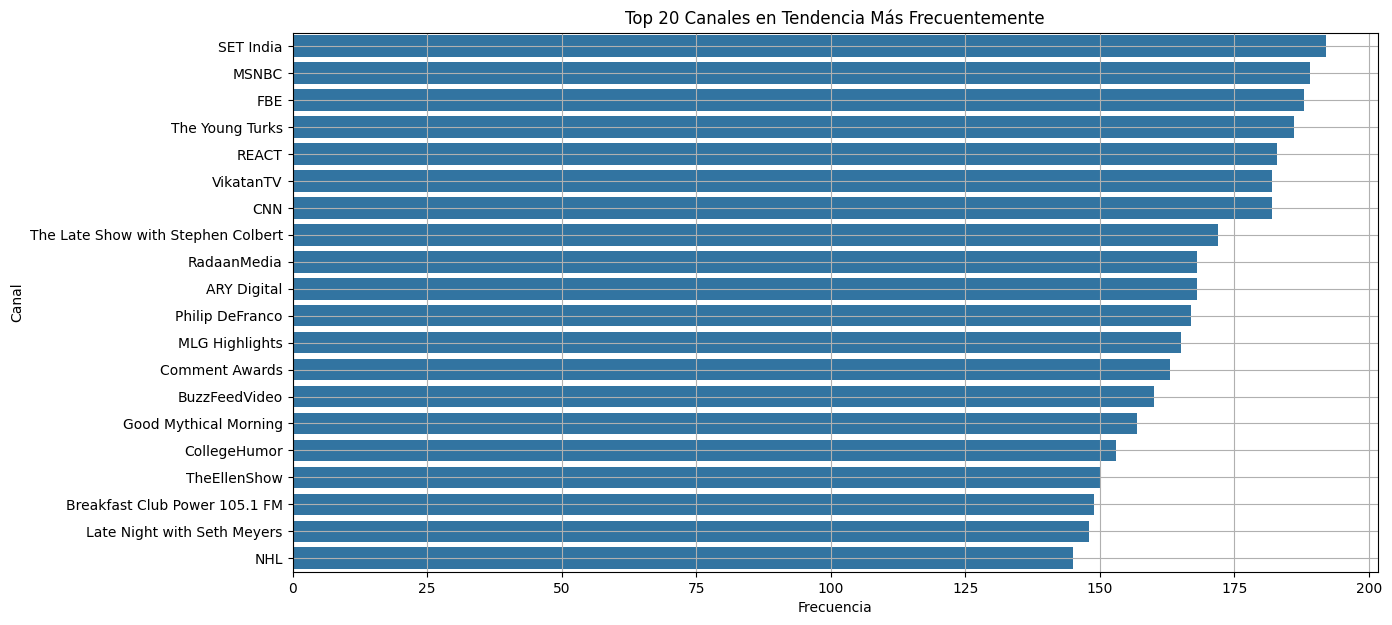

C:\Users\sdiaz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdiaz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdiaz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdiaz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

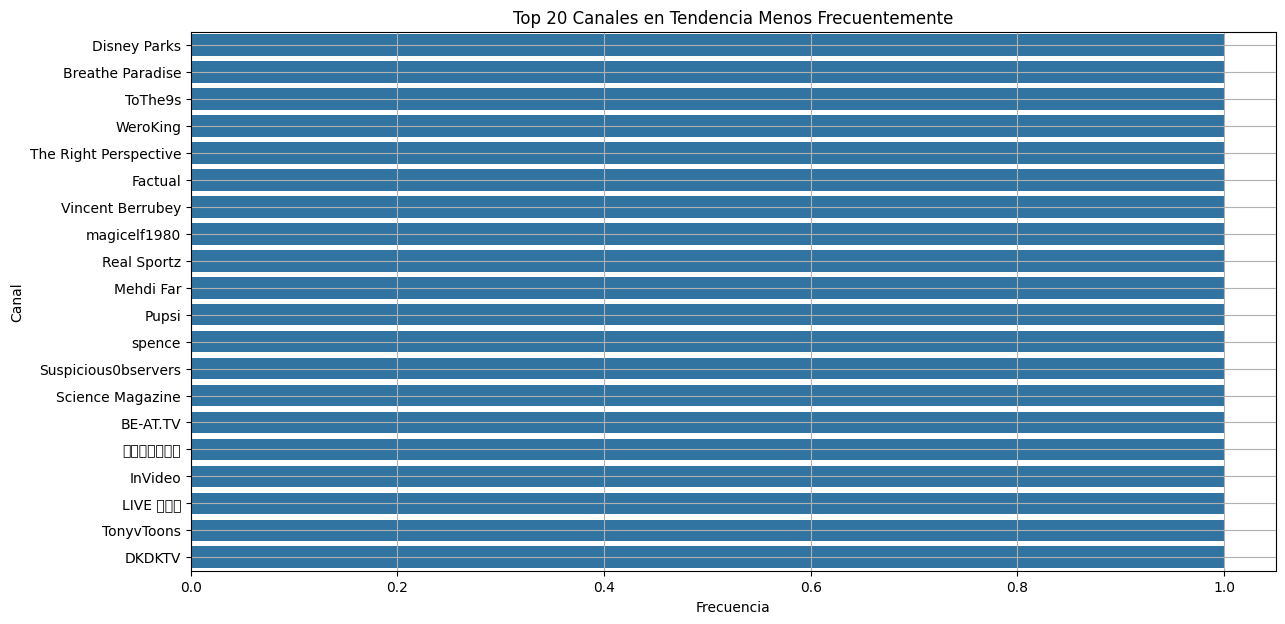

In [47]:
frecuencia_canales = db_sin_outliers['channel_title'].value_counts().reset_index(name='frequency').rename(columns={'index': 'channel_title'})
print(frecuencia_canales)

plt.figure(figsize=(14, 7))
sns.barplot(x='frequency', y='channel_title', data=frecuencia_canales.head(20))
plt.title('Top 20 Canales en Tendencia Más Frecuentemente')
plt.xlabel('Frecuencia')
plt.ylabel('Canal')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='frequency', y='channel_title', data=frecuencia_canales.tail(20))
plt.title('Top 20 Canales en Tendencia Menos Frecuentemente')
plt.xlabel('Frecuencia')
plt.ylabel('Canal')
plt.grid(True)
plt.show()

Pregunta 7: ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?

                        state         views       likes   dislikes
10                     Quebec  1.931036e+09  50784985.0  1707606.0
12                      Yukon  1.901141e+09  51408141.0  1668905.0
7                     Nunavut  1.876496e+09  50119102.0  1569413.0
0                     Alberta  1.859736e+09  51735131.0  1700291.0
9        Prince Edward Island  1.853860e+09  48881785.0  1632295.0
1            British Columbia  1.835796e+09  50416574.0  1576071.0
8                     Ontario  1.822655e+09  49239560.0  1639378.0
3               New Brunswick  1.784790e+09  47691683.0  1611871.0
5       Northwest Territories  1.779996e+09  47390053.0  1571288.0
11               Saskatchewan  1.769546e+09  48067268.0  1549084.0
2                    Manitoba  1.753627e+09  49092035.0  1529171.0
6                 Nova Scotia  1.742663e+09  47323544.0  1580973.0
4   Newfoundland And Labrador  1.710480e+09  47460368.0  1595913.0


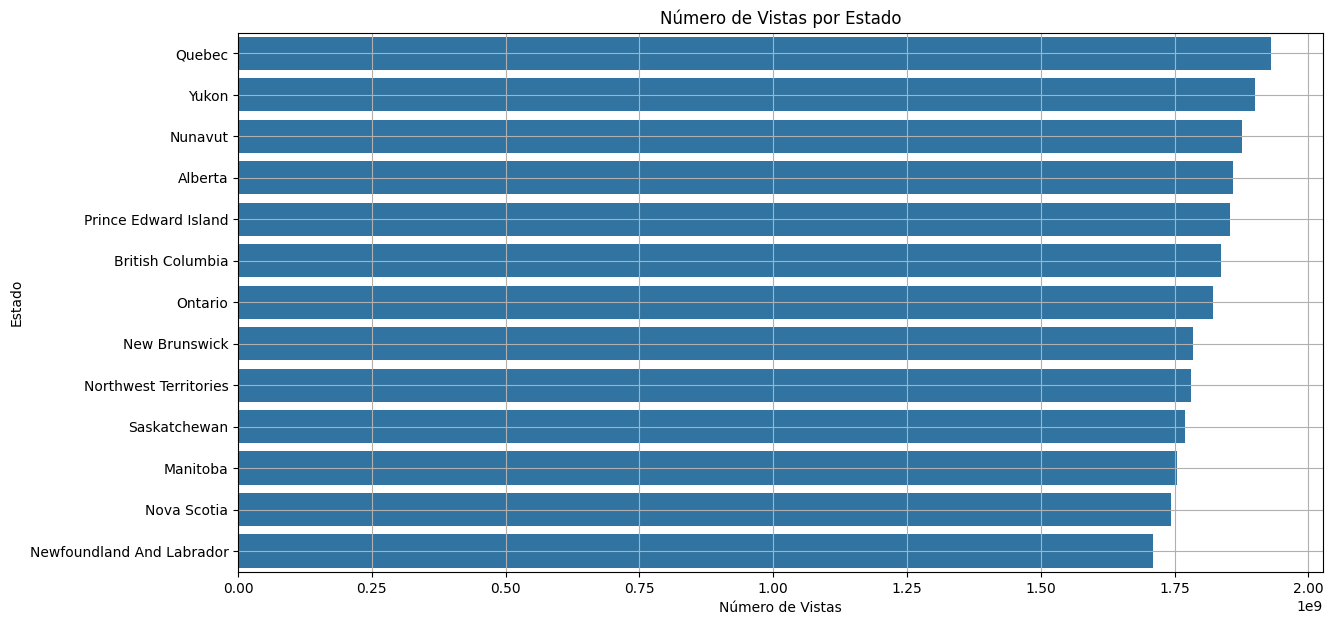

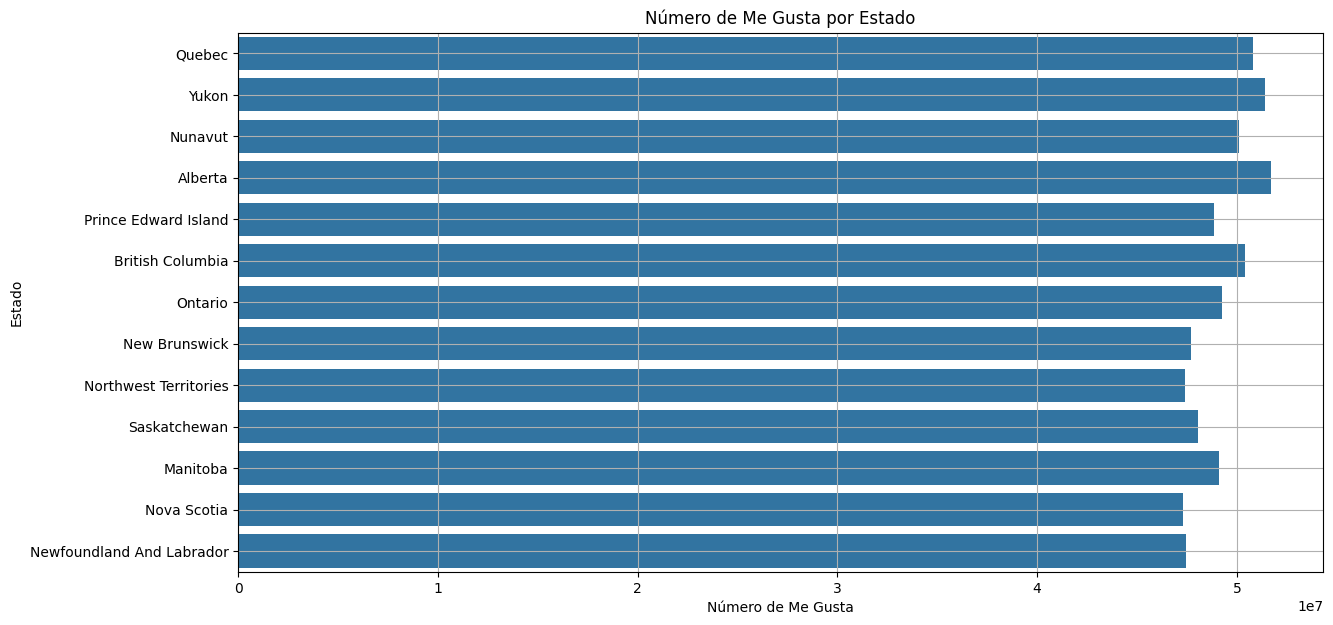

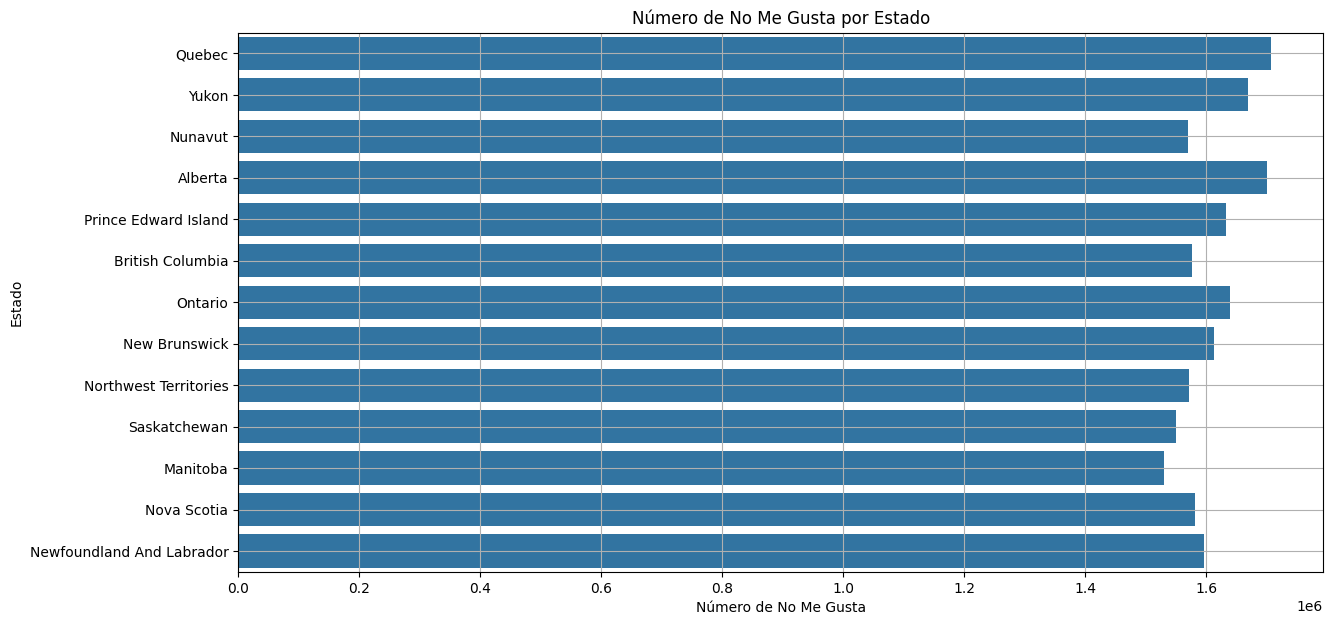

In [48]:
estado_vistas = db_sin_outliers.groupby('state')[['views', 'likes', 'dislikes']].sum().reset_index().sort_values(by='views', ascending=False)
print(estado_vistas)

plt.figure(figsize=(14, 7))
sns.barplot(x='views', y='state', data=estado_vistas)
plt.title('Número de Vistas por Estado')
plt.xlabel('Número de Vistas')
plt.ylabel('Estado')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='likes', y='state', data=estado_vistas)
plt.title('Número de Me Gusta por Estado')
plt.xlabel('Número de Me Gusta')
plt.ylabel('Estado')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='dislikes', y='state', data=estado_vistas)
plt.title('Número de No Me Gusta por Estado')
plt.xlabel('Número de No Me Gusta')
plt.ylabel('Estado')
plt.grid(True)
plt.show()

Pregunta 8: ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?

Modelo para predecir Vistas: MSE = 0.022693936316815492, R2 = 0.3956346645283225
Modelo para predecir Me Gusta: MSE = 0.022921149552136904, R2 = 0.3804688492758116
Modelo para predecir No Me Gusta: MSE = 0.022880654290363595, R2 = 0.36200617094439413


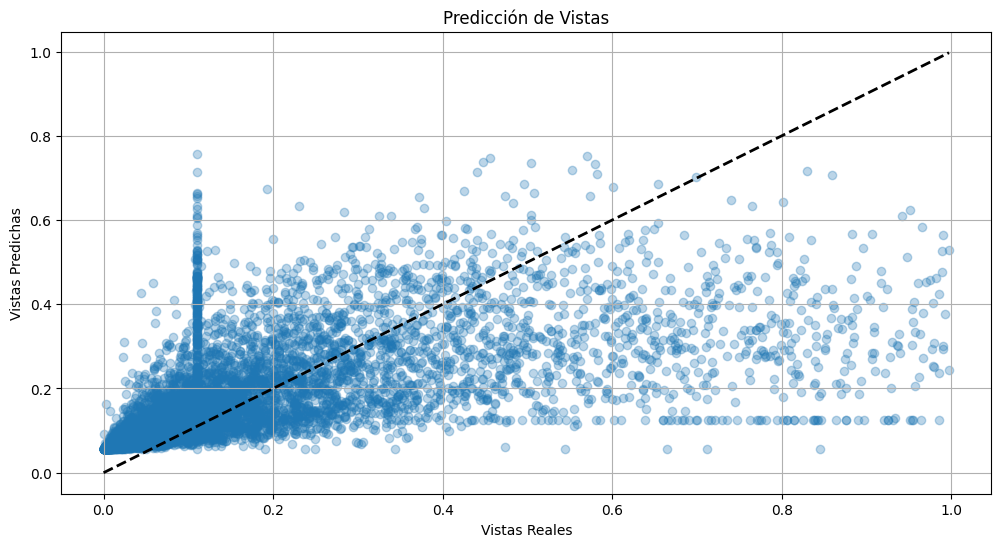

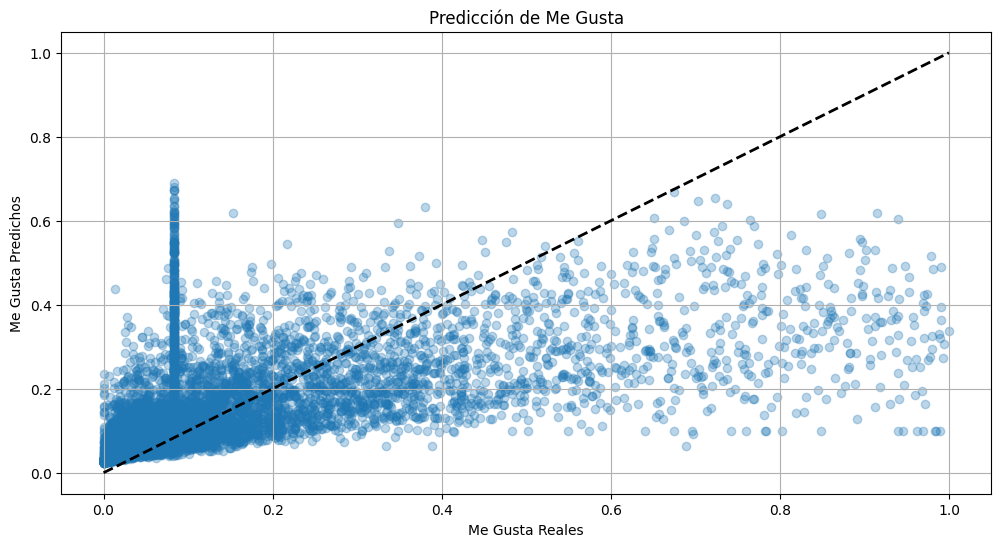

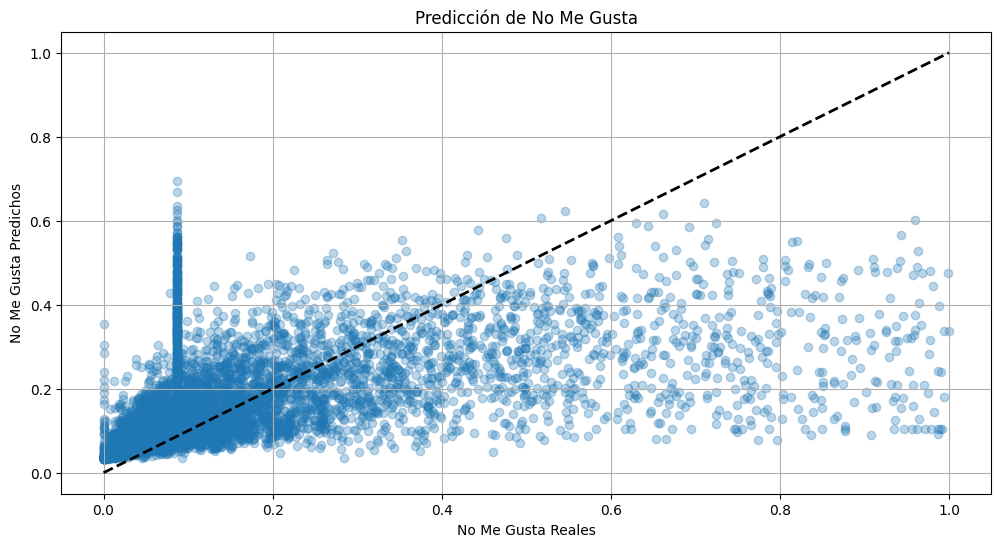

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = db_sin_outliers[['new_comment_count', 'new_likes', 'new_dislikes', ]]
y_views = db_sin_outliers['new_views']

X_sin_likes = db_sin_outliers[['new_comment_count',  'new_dislikes', 'new_views']]
y_likes = db_sin_outliers['new_likes']

X_sin_dislikes = db_sin_outliers[['new_comment_count', 'new_likes', 'new_views' ]]
y_dislikes = db_sin_outliers['new_dislikes']

X_train, X_test, y_views_train, y_views_test = train_test_split(X, y_views, test_size=0.2, random_state=42)
X_train_2, X_test2, y_views_train, y_views_test = train_test_split(X_sin_likes, y_views, test_size=0.2, random_state=42)
X_train_3, X_test3, y_views_train, y_views_test = train_test_split(X_sin_dislikes, y_views, test_size=0.2, random_state=42)
_, _, y_likes_train, y_likes_test = train_test_split(X_sin_likes, y_likes, test_size=0.2, random_state=42)
_, _, y_dislikes_train, y_dislikes_test = train_test_split(X_sin_dislikes, y_dislikes, test_size=0.2, random_state=42)

model_views = LinearRegression()
model_views.fit(X_train, y_views_train)
y_views_pred = model_views.predict(X_test)
mse_views = mean_squared_error(y_views_test, y_views_pred)
r2_views = r2_score(y_views_test, y_views_pred)

model_likes = LinearRegression()
model_likes.fit(X_train_2, y_likes_train)
y_likes_pred = model_likes.predict(X_test2)
mse_likes = mean_squared_error(y_likes_test, y_likes_pred)
r2_likes = r2_score(y_likes_test, y_likes_pred)

model_dislikes = LinearRegression()
model_dislikes.fit(X_train_3, y_dislikes_train)
y_dislikes_pred = model_dislikes.predict(X_test3)
mse_dislikes = mean_squared_error(y_dislikes_test, y_dislikes_pred)
r2_dislikes = r2_score(y_dislikes_test, y_dislikes_pred)

print(f'Modelo para predecir Vistas: MSE = {mse_views}, R2 = {r2_views}')
print(f'Modelo para predecir Me Gusta: MSE = {mse_likes}, R2 = {r2_likes}')
print(f'Modelo para predecir No Me Gusta: MSE = {mse_dislikes}, R2 = {r2_dislikes}')

# Graficar los resultados

# Vistas
plt.figure(figsize=(12, 6))
plt.scatter(y_views_test, y_views_pred, alpha=0.3)
plt.plot([y_views_test.min(), y_views_test.max()], [y_views_test.min(), y_views_test.max()], 'k--', lw=2)
plt.title('Predicción de Vistas')
plt.xlabel('Vistas Reales')
plt.ylabel('Vistas Predichas')
plt.grid(True)
plt.show()

# Me Gusta
plt.figure(figsize=(12, 6))
plt.scatter(y_likes_test, y_likes_pred, alpha=0.3)
plt.plot([y_likes_test.min(), y_likes_test.max()], [y_likes_test.min(), y_likes_test.max()], 'k--', lw=2)
plt.title('Predicción de Me Gusta')
plt.xlabel('Me Gusta Reales')
plt.ylabel('Me Gusta Predichos')
plt.grid(True)
plt.show()

# No Me Gusta
plt.figure(figsize=(12, 6))
plt.scatter(y_dislikes_test, y_dislikes_pred, alpha=0.3)
plt.plot([y_dislikes_test.min(), y_dislikes_test.max()], [y_dislikes_test.min(), y_dislikes_test.max()], 'k--', lw=2)
plt.title('Predicción de No Me Gusta')
plt.xlabel('No Me Gusta Reales')
plt.ylabel('No Me Gusta Predichos')
plt.grid(True)
plt.show()